# Aussie Weather
What does it look and feel like the day before it rains in Australia?

Data contains 10 years of daily weather data from various locations in Australia. 


## Exploring and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
#just dropping nan to save time
df=df.dropna()

In [5]:
df.shape

(56420, 23)

In [6]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
6049         SSW           48.0        ENE  ...        20.0         13.0   
6050           S           37.0        SSE  ...        30.0          8.0   
6052         NNE           46.0        NNE  ...        42.0         22.0   
6053         WNW           31.0        WNW  ...        37.0         22.0   
6054         WNW           35.0         NW  ...        19.0         15.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6049       1006.3       1004.4       2.0       5.0     26.6     33.4   
6050       1012.9       1012.1       1.0       1.0     20.3     27.0   
6052       1012.3       1009.2       1.0       6.0     28.7     34.9   
6053       1012.7       1009.1       1.0       5.0     29.1     35.6   
6054       1010.7       1007.4       1.0       6.0     33.6     37.6   

      RainToday  RainTomorrow  
6049         No            No  
6050         No            No  
6052         No            No  
6053         No            No  
6054         No            No  

[5 rows x 23 columns]

In [7]:
#changing rain tomorrow column to '0' for 'No' and '1' for 'Yes'
df[['RainTomorrow', 'RainToday']] = df[['RainTomorrow','RainToday']].replace(('No', 'Yes'), (0, 1))


In [8]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
6049         SSW           48.0        ENE  ...        20.0         13.0   
6050           S           37.0        SSE  ...        30.0          8.0   
6052         NNE           46.0        NNE  ...        42.0         22.0   
6053         WNW           31.0        WNW  ...        37.0         22.0   
6054         WNW           35.0         NW  ...        19.0         15.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6049       1006.3       1004.4       2.0       5.0     26.6     33.4   
6050       1012.9       1012.1       1.0       1.0     20.3     27.0   
6052       1012.3       1009.2       1.0       6.0     28.7     34.9   
6053       1012.7       1009.1       1.0       5.0     29.1     35.6   
6054       1010.7       1007.4       1.0       6.0     33.6     37.6   

      RainToday  RainTomorrow  
6049          0             0  
6050          0             0  
6052          0             0  
6053          0             0  
6054          0             0  

[5 rows x 23 columns]

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

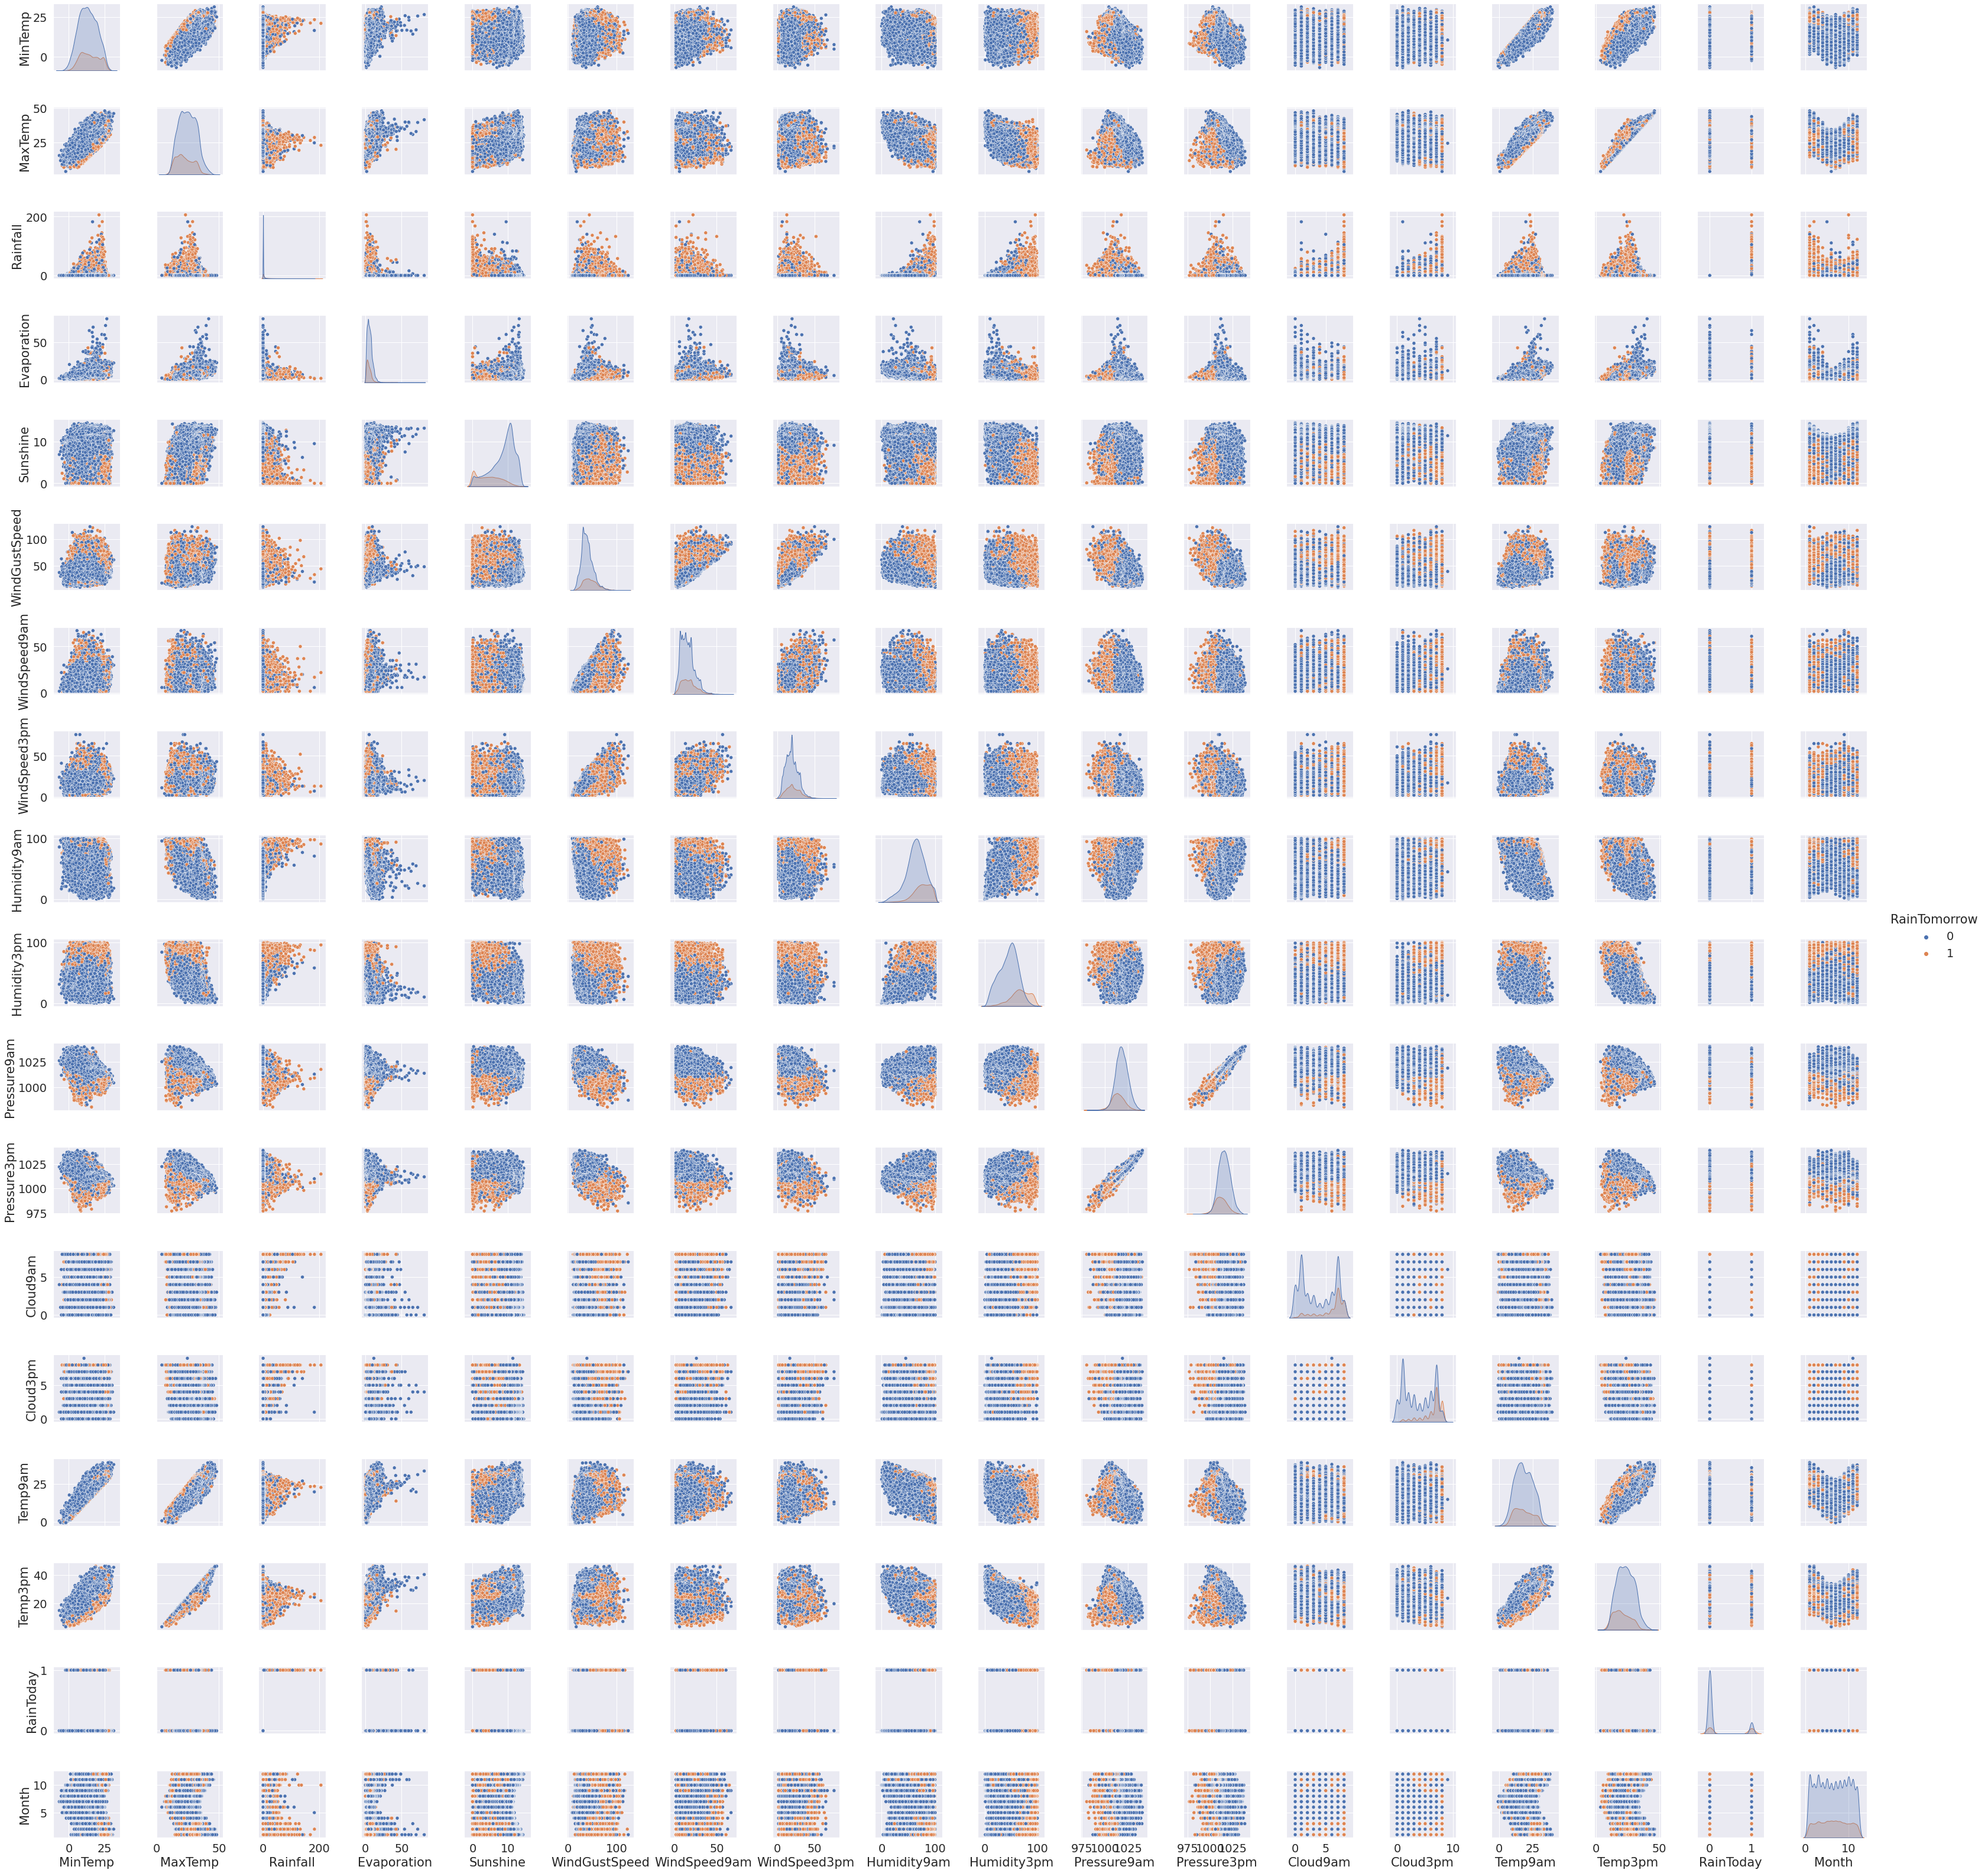

In [10]:
sns.set(font_scale = 1.75)
sns.pairplot(df, hue='RainTomorrow')

It looks like humidity, sunshine and pressure have the strongest relationship with rain tomorrow.
I would imagine that rain today also comes into play.

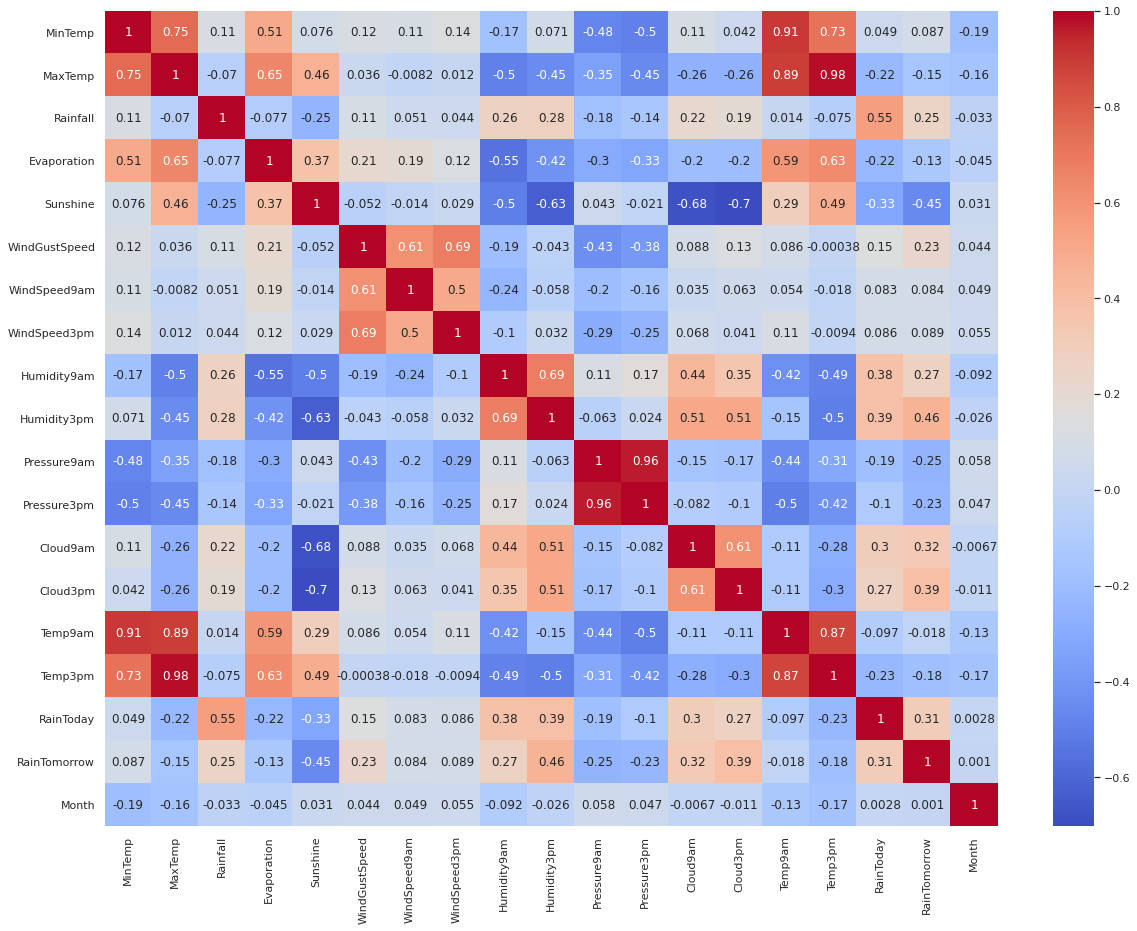

In [11]:
#Let's look at a heatmap to see if I'm right.
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

RainTomorrow is more correlated with rainfall (the amount that it rained today) than the yes/no RainToday column. Likely because the actual amount that it rained today might increase or decrease the chance of rain tomorrow. For example, if it rains a lot today in a large, slow moving storm that storm might still be around tomorrow and prodcuce more rain. Whereas a small storm that only poduces 1mm of rain probably will not produce more rain the next day. Let's explore this theory further. 
I will also take a closer look at relationships between rain tomorrow and sunshine, humidity, and clouds. For now I'll skip pressure since the other variables seem to have stronger correlations. 

### Starting with humidity

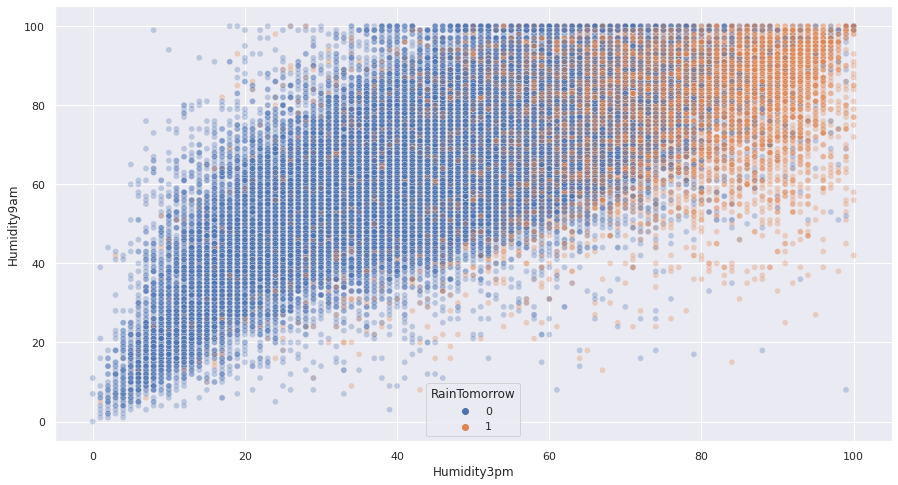

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Humidity3pm',y='Humidity9am', hue='RainTomorrow', alpha=0.3)

Higher humidity = higher chance of rain tomorrow. There appears to be very few days where it rained tomorrow with low humidity today (no matter the time of day). 

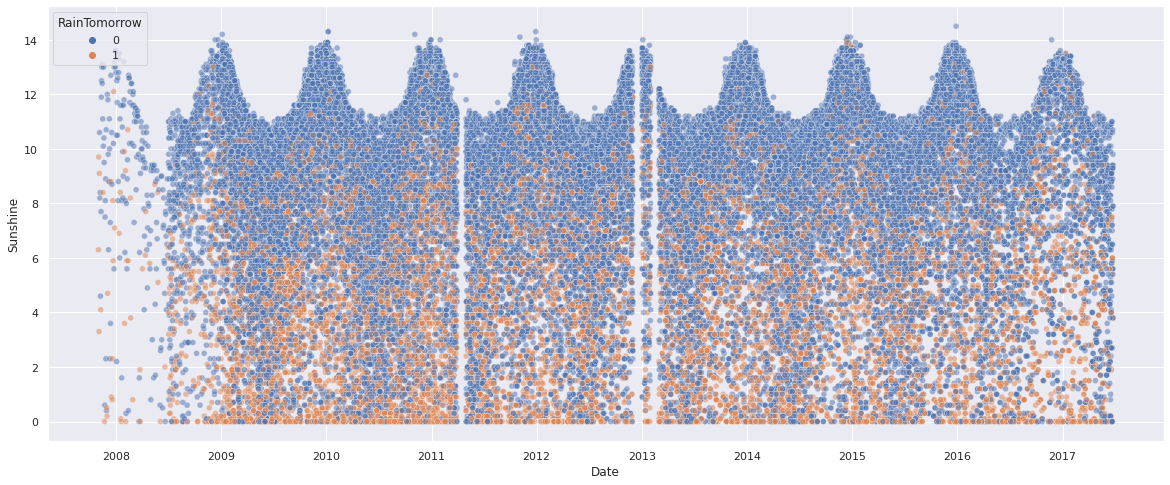

In [13]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x='Date',y='Sunshine', hue='RainTomorrow', alpha=0.5)

In this dataset sunshine is: "The number of hours of bright sunshine in the day". 
From this plot we can assume fewer hours of sunshine means there are more clouds that day which could result in rain the next day. The peaks on this plot represent summer when there are more daylight hours per day. 

The boxplot below confirms that days when it rains tomorrow do tend to have fewer hours of bright sunshine than days where it does not rain the next day. 

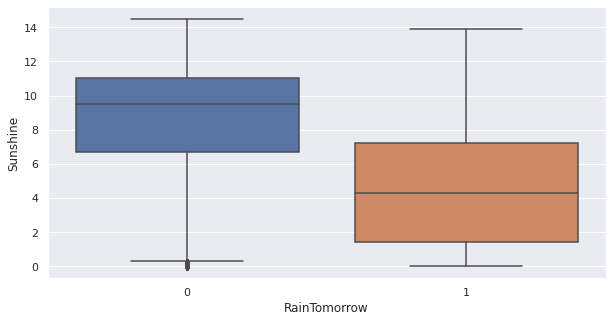

In [14]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="RainTomorrow", y="Sunshine", data=df)


### Clouds and Rain Tomorrow

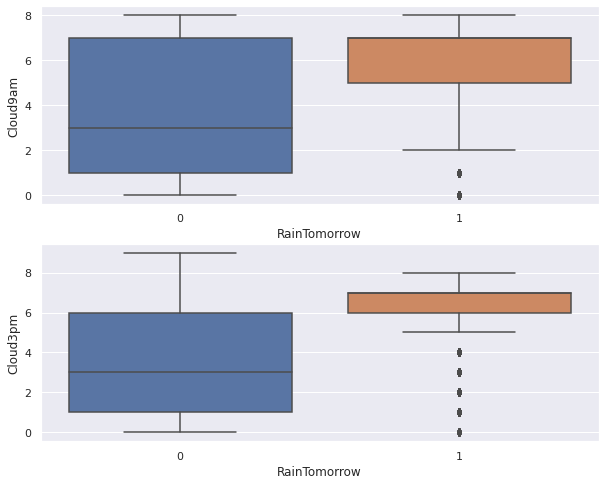

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))

sns.boxplot(x="RainTomorrow", y="Cloud9am", data=df, ax=ax1)
sns.boxplot(x="RainTomorrow", y="Cloud3pm", data=df, ax=ax2)

There is clearly a more narrow range in amount of cloud cover on days where it rains tomorrow. It seems that cloud cover at 3pm is a better indicator of rain tomorrow than cloud9am. 

### Now let's explore the amount of rain today and rain tomorrow

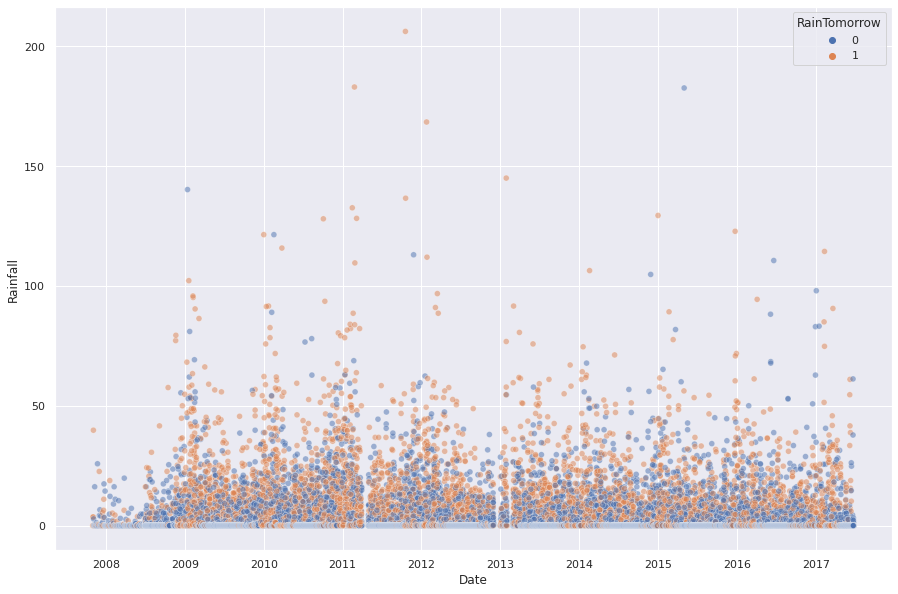

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='Date',y='Rainfall', hue='RainTomorrow', alpha=0.5)

We can see the seasonality here, it looks like it rains more in the first part of the year (during the summer). 

Text(0, 0.5, 'Average Monthly Rainfall')

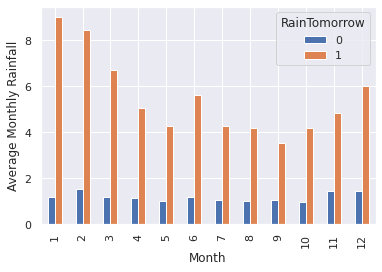

In [17]:
#Since rainfall is influnced by season, I averaged the rainfall by the month 
group = df.groupby(['RainTomorrow','Month'], as_index=False)['Rainfall'].mean()
pivot = group.pivot_table(index='Month', columns='RainTomorrow', values='Rainfall')
labels=group['Month']


pivot.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Monthly Rainfall')

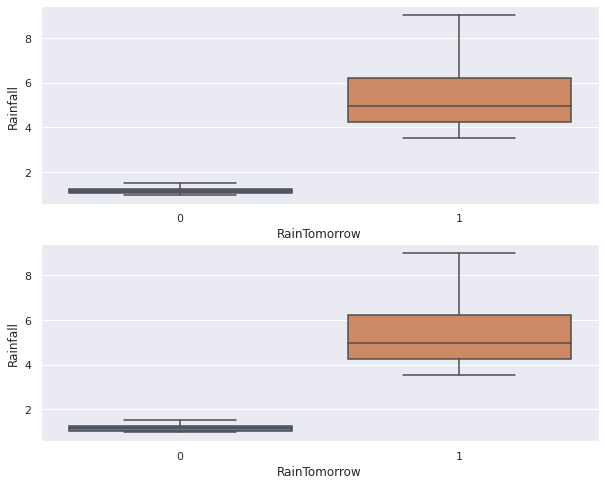

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))

sns.boxplot(x="RainTomorrow", y="Rainfall", data=group, ax=ax1)
sns.boxplot(x="RainTomorrow", y="Rainfall", data=group, ax=ax2)

The two charts above show that on average, days where it rains tomorrow do see more rain the day before. 

### Conclusions

From this quick analysis, it looks like the day before it rains in Australia you could expect afternoon clouds, high humidity (> 70% humidity), fewer hours of bright sunshine than other days (because of the clouds), as well as a possible rainshower that day. Seasonality also plays into the chance of rain tomorrow, during the summer--especially January-March you can expect a higher percent chance of rain tomorrow, no matter the conidtions that day. 